In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

## Discrete V/s continuous functions

For optimization problems, continuous functions perform better. 

* Step function - **Discrete function**.
* Sigmoid function - **Continuous function**.

### Step function (Discrete)

Step function is defined as,

$$
y =
\left\{
\begin{array}{ll}
1 & \mbox{if $x\geq 0$},\\
0 & \mbox{if $x \lt 0$},\\
\end{array}
\right.
$$


![Step function](perceptron-step.svg)

### Sigmoid function (Continuous)

Sigmoid function is defined as,

$$
y = \frac{1}{1 + e^{-x}}
$$

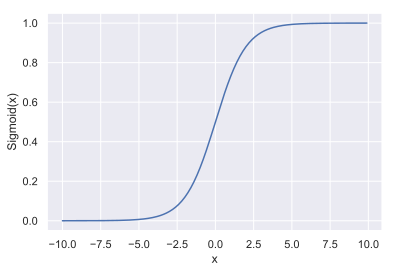

In [2]:
def sigmoid(x):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)

plt.xlabel("x"); plt.ylabel("Sigmoid(x)")
plt.plot(x, y)

## Softmax function

In case of **Multi-class Classification**, Sigmoid function won't work. Sigmoid function can only perform binary classification (Yes/No, 1/0, Class 1/Class 2). If there are 3 or more classes, softmax function is useful.

For example, in **Sigmoid function**

* `P(Interview offer) = 0.6` => `P(No Interview offer) = 0.4`
* `score(Interview) = Linear function (our model)`
* `P(Interview offer) = sigmoid(score)`

In case of **Multi-class** (say 3)

* If the scores are as follows
    * `Score(Class 1) = 2`
    * `Score(Class 2) = 1`
    * `Score(Class 3) = 0`
    
How to turn the scores into probabilities? We can apply **softmax** for the scores $z_1, z_2, ... z_n$ as follows,

$$
P(Class-i) = \frac{e^{z_i}}{e^{z_1} + e^{z_2} + ... + e^{z_n}}
$$

In [3]:
def softmax(scores):
    """Softmax function"""
    expz = np.exp(scores)
    return np.divide(expz, np.sum(expz))

softmax([1, 2, 3])

array([0.09003057, 0.24472847, 0.66524096])

## One-hot encoding

One-hot encoding turns the following table,

| Applicant's degree | Categorical value | Salary |
|--------------------|-------------------|--------|
| Bachelor           | 0                 | 1200   |
| Master             | 1                 | 1750   |
| Master             | 1                 | 2000   |
| Doctorate          | 2                 | 3500   |
| Bachelor           | 0                 | 1400   |

into,

| Bachelor? | Master? | Dcotorate? | Salary |
|-----------|---------|------------|--------|
| 1         | 0       | 0          | 1200   |
| 0         | 1       | 0          | 1750   |
| 0         | 1       | 0          | 2000   |
| 0         | 0       | 1          | 3500   |
| 1         | 0       | 0          | 1400   |

Converting categorical variable into One-hot encoding ensures that value associated with variables (Bachelor = 0, Master = 1, Doctorate = 2) are independent of each other.

In [4]:
def one_hot_encoding(categories, classes):
    """One-hot encoding (https://stackoverflow.com/a/29831596/2804560)
    
    args:
        categories: List of category variable numbers - [1, 0, 4, 5]
        classes: Total No. of category variables
    """
    categories = np.array(categories)
    one_hot = np.zeros((len(categories), classes))
    one_hot[np.arange(categories.size), categories] = 1
    return one_hot
    
one_hot_encoding([0, 1, 1, 2, 0], 3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

## Cross Entropy

In order to minimize the error, we have to maximize the probabilities of points being correctly classified. Let's take 2 models classifying 4 datapoints.

In [5]:
points = pd.DataFrame([
    { "gpa": 3, "experience": 6, "offer": 0 },
    { "gpa": 6, "experience": 3, "offer": 0 },
    { "gpa": 9, "experience": 8, "offer": 1 },
    { "gpa": 7, "experience": 9, "offer": 1 },
])

def plot_points():
    g = sns.pairplot(
        x_vars = ["gpa"],
        y_vars = ["experience"],
        
        data = points,
        hue = "offer",
        height = 5,
        palette = {0:"red", 1:"green"}
    )

    # Add Labels, axes (same as before)
    g.set(
        xlim = (2.5, 10.5),
        ylim = (1.5, 10.5),
        xlabel="GPA (X1)",
        ylabel="Experience (X2)"
    )

**Model 1**

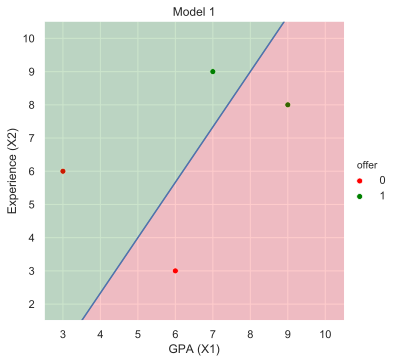

In [6]:
def model_1():
    x  = np.arange(0, 12, 0.1)
    y_line = (5*x - 13) / 3

    y_lower = np.zeros(x.shape)        # For Lower box (y = 0)
    y_upper = 11 * np.ones(x.shape)  # For Upper box (y = 11x)

    plt.plot(x, y_line)
    plt.title("Model 1")

    plt.fill_between(x, y_line, y_lower, color='red', alpha='0.2')
    plt.fill_between(x, y_line, y_upper, color='green', alpha='0.2')

plot_points()
model_1()

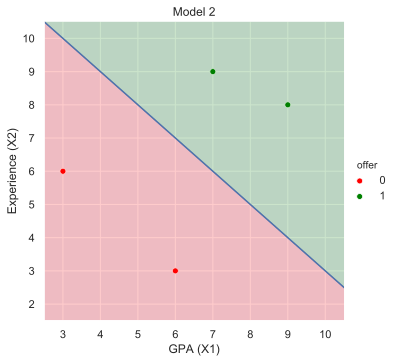

In [7]:
def model_2():
    x  = np.arange(0, 12, 0.1)
    y_line = 13 - x

    y_lower = np.zeros(x.shape)        # For Lower box (y = 0)
    y_upper = 11 * np.ones(x.shape)  # For Upper box (y = 11x)

    plt.plot(x, y_line)
    plt.title("Model 2")

    plt.fill_between(x, y_line, y_lower, color='red', alpha='0.2')
    plt.fill_between(x, y_line, y_upper, color='green', alpha='0.2')

plot_points()
model_2()

For **Model 1**, assume the probabilities of points being correctly classified are `0.1, 0.8, 0.3, 0.7`,

```
P(Model 1) = 0.1 * 0.8 * 0.3 * 0.7 = 0.0168
```

For **Model 2**, assume the probabilities of points being correctly classified are `0.8, 0.7, 0.9, 0.8`,

```
P(Model 2) = 0.8 * 0.7 * 0.9 * 0.8 = 0.4032
```

Clearly, **Model 2** is the winner, as it correctly classifies the 4 points and has got higher model probability.

But, multiplying the probabilities has a few downsides

* Number can get very small
* Multiplication is expensive to compute if there are a huge number of data points
* Change in 1 point can change the whole product drastically

Hence, we take the negative natural logarithm to convert the product into sum

```
Model 1 = -ln(0.1) + -ln(0.8) + -ln(0.3) + -ln(0.7) = 4.0863763926
```

```
Model 2 = -ln(0.8) + -ln(0.7) + -ln(0.9) + -ln(0.8) = 0.9083225622
```

This is called **Cross Entropy**.

> **Lower** the Cross entropy, **better** the model

**Goal**: Minimize the Cross Entropy

### Formula

If $p_1, p_2, ... p_m$ are the probabilities of $m$ points, and $y_1, y_2, ..., y_m$ are the outcomes (0 or 1)

$$
\text{Cross Entropy} = - \sum_{i=1}^{m} y_i ln(p_i) + (1 - y_i)ln(1 - p_i)
$$

In [8]:
def cross_entropy(probabilities, outcomes):
    Y = np.array(outcomes)
    P = np.array(probabilities)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

cross_entropy([0.8, 0.6, 0.2], [1, 1, 0])

0.9571127263944101

For **Multi-class**, Cross entropy is given by,

$$
\text{Cross Entropy} = - \sum_{i=1}^{n} \sum_{j=1}^{m} y_{ij} ln(p_{ij})
$$

## Error functions

Error functions quantify how badly the model is at present. Using error values, we can take further steps to improve our model. Naive (read ineffective) error measures include

* Number of misclassifications in a Classification problem
* Sum of distance between model and points (in a linear model)

Properties of error functions for gradient descent

* Should be continuous 
* Should be differentiable

$$
\text{Error function} = -\frac{1}{m} \sum_{i=1}^{m} (1 - y_i)ln(1 - \hat{y_i}) + y_i ln(\hat{y_i})
$$

$$
E(W, b) = -\frac{1}{m} \sum_{i=1}^{m} (1 - y_i)ln(1 - \sigma(WX^{(i)} + b)) + y_i ln(\sigma(WX^{(i)} + b))
$$

**Goal**: Minimize error function

For **Multi-class**,

$$
\text{Error function} = -\frac{1}{m} \sum_{i=1}^{m}  \sum_{j=1}^{n} y_i ln(\hat{y_i})
$$